## Preprocessing

In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# tensorflow
import tensorflow as tf

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [5]:
df.IS_SUCCESSFUL.value_counts()

IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df2 = df.copy()

df2 = df2.drop(["EIN", "NAME"], axis=1)
df2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Determine the number of unique values in each column.
df2.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = df2['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [9]:
df2['APPLICATION_TYPE'].value_counts() < 500

APPLICATION_TYPE
T3     False
T4     False
T6     False
T5     False
T19    False
T8     False
T7     False
T10    False
T9      True
T13     True
T12     True
T2      True
T25     True
T14     True
T29     True
T15     True
T17     True
Name: count, dtype: bool

In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    df2['APPLICATION_TYPE'] = df2['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df2['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_counts = df2['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = df2['CLASSIFICATION'].value_counts()
classification_counts_gt1 = classification_counts[classification_counts > 1]
print(classification_counts_gt1)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts() < 700].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df2['CLASSIFICATION'] = df2['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
df2['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
df2 = pd.get_dummies(df2)
df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False


In [14]:
# Split our preprocessed data into our features and target arrays
X = df2.drop('IS_SUCCESSFUL', axis=1)  
y = df2['IS_SUCCESSFUL']  

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(27439, 44)
(6860, 44)


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=5, activation='relu', input_dim=len(X.columns)))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=3, activation='relu'))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


# Check the structure of the model
nn1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 5)                   │             225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247 (988.00 B)

 Trainable params: 247 (988.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7230 - loss: 0.5549
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7205 - loss: 0.5602
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7290 - loss: 0.5550
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7255 - loss: 0.5553
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5558
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7232 - loss: 0.5587
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7299 - loss: 0.5523
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7305 - loss: 0.5500
Epoch 9/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7265 - loss: 0.5556
Epoch 10/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7252 - loss: 0.5539
Epoch 11/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7361 - loss: 0.5452
Epoch 12/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 1ms/step - accuracy: 0.7198 - loss: 0.5620
Loss: 0.562018871307373, Accuracy: 0.7198250889778137


In [22]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model.predict(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8695  4147]
 [ 3199 11398]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.73      0.68      0.70     12842
           1       0.73      0.78      0.76     14597

    accuracy                           0.73     27439
   macro avg       0.73      0.73      0.73     27439
weighted avg       0.73      0.73      0.73     27439

    



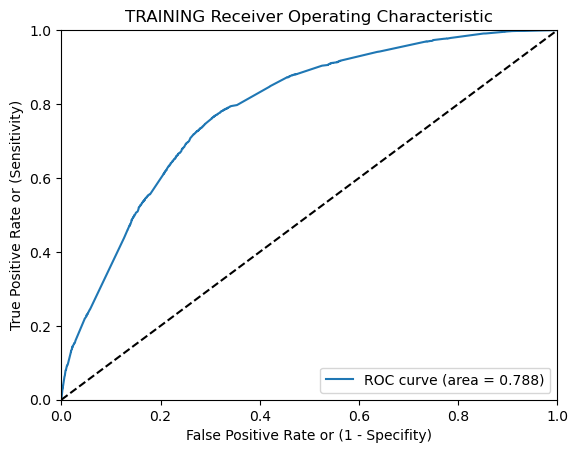



TESTING METRICS

    Test Confusion Matrix:
    [[2137 1059]
 [ 826 2838]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.67      0.69      3196
           1       0.73      0.77      0.75      3664

    accuracy                           0.73      6860
   macro avg       0.72      0.72      0.72      6860
weighted avg       0.72      0.73      0.72      6860

    



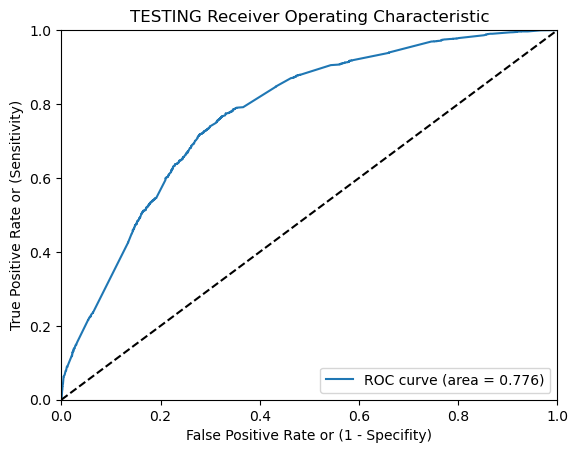

In [32]:
doClassification_NN(nn, X_train_scaled, X_test_scaled, y_train, y_test)

In [23]:
# Export our model to HDF5 file
nn1.save("nn1.h5")

In [24]:
# OPTIMIZATIONS

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Add a second layer
nn2.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Add a third layer
nn2.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Add the output layer that uses a probability activation function
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 15)                  │             675 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the Sequential model together and customize metrics
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn2.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6624 - loss: 0.6312
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7301 - loss: 0.5561
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7328 - loss: 0.5515
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7304 - loss: 0.5532
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7284 - loss: 0.5566
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7284 - loss: 0.5532
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7321 - loss: 0.5467
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7368 - loss: 0.5417
Epoch 9/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7314 - loss: 0.5464
Epoch 10/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7325 - loss: 0.5475
Epoch 11/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7301 - loss: 0.5510
Epoch 12/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7216 - loss: 0.5547
Loss: 0.5547159910202026, Accuracy: 0.7215743660926819


858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8594  4248]
 [ 3077 11520]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.74      0.67      0.70     12842
           1       0.73      0.79      0.76     14597

    accuracy                           0.73     27439
   macro avg       0.73      0.73      0.73     27439
weighted avg       0.73      0.73      0.73     27439

    



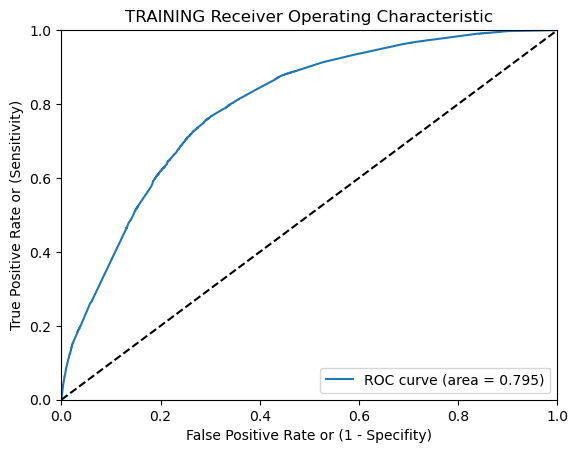



TESTING METRICS

    Test Confusion Matrix:
    [[2080 1116]
 [ 794 2870]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.65      0.69      3196
           1       0.72      0.78      0.75      3664

    accuracy                           0.72      6860
   macro avg       0.72      0.72      0.72      6860
weighted avg       0.72      0.72      0.72      6860

    



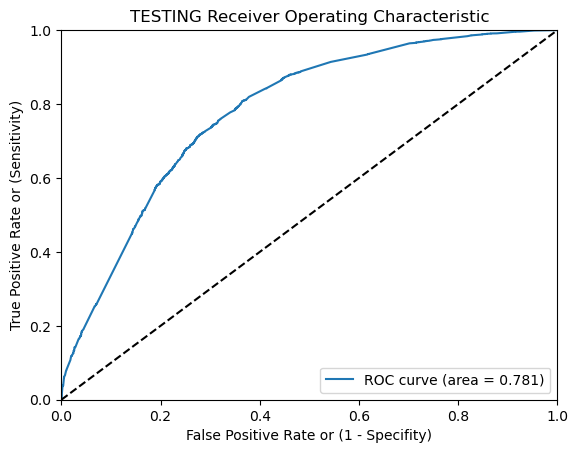

In [30]:
 doClassification_NN(nn2, X_train_scaled, X_test_scaled, y_train, y_test)

In [31]:
# Export our model to HDF5 file
nn2.save("nn2.h5")

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn3 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn3.add(tf.keras.layers.Dense(units=25, activation="relu", input_dim=len(X.columns))) 

# Add a second layer
nn3.add(tf.keras.layers.Dense(units=14, activation="relu"))

# Add a third layer
nn3.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Add the output layer that uses a probability activation function
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 25)                  │           1,125 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 14)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,602 (6.26 KB)

 Trainable params: 1,602 (6.26 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

TRAINING METRICS

    Train Confusion Matrix:
    [[ 9151  3691]
 [ 3062 11535]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.71      0.73     12842
           1       0.76      0.79      0.77     14597

    accuracy                           0.75     27439
   macro avg       0.75      0.75      0.75     27439
weighted avg       0.75      0.75      0.75     27439

    



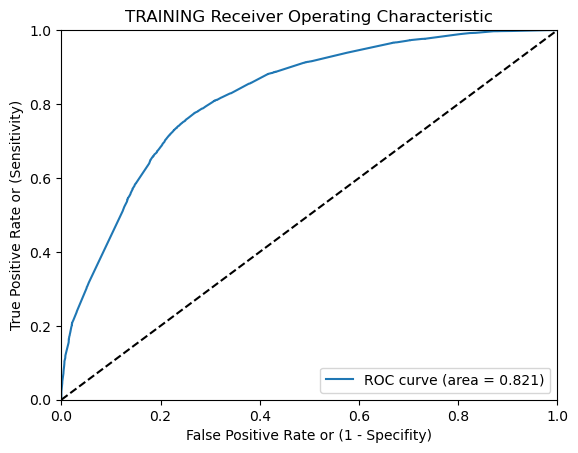



TESTING METRICS

    Test Confusion Matrix:
    [[2148 1048]
 [ 874 2790]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.71      0.67      0.69      3196
           1       0.73      0.76      0.74      3664

    accuracy                           0.72      6860
   macro avg       0.72      0.72      0.72      6860
weighted avg       0.72      0.72      0.72      6860

    



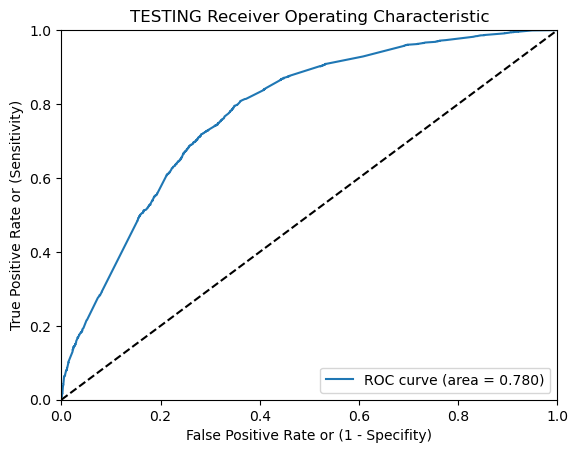

In [33]:
# initialize
xgb = XGBClassifier(random_state=42)

# fit
xgb.fit(X_train_scaled, y_train)

doClassification(xgb, X_train_scaled, X_test_scaled, y_train, y_test)